In [119]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection, tree, metrics
import m2cgen as m2c
import numpy as np

# Set display options
# pd.set_option('display.max_rows', None)

In [120]:
# Read CSV file
df = pd.read_csv('Algerian_forest_fires_dataset.csv', header=1)
df = df.drop([122, 123, 165], axis=0)
df.reset_index(inplace=True)
df = df.drop('index', axis=1)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
239,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
240,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
241,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [121]:
# Replace empty values in 'Region'
df.loc[:121, 'Region'] = 'Bejaia'
df.loc[122:244, 'Region'] = 'Sidi-Bel'
# Drop unnecessary columns
df = df.drop(['day', 'month', 'year'], axis=1)

C:\Users\PC\AppData\Local\Temp\ipykernel_10452\334675726.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Bejaia' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:121, 'Region'] = 'Bejaia'


In [122]:
# Strip leading/trailing whitespaces in column names and 'Classes'
df.columns = df.columns.str.strip()
df['Classes'] = df['Classes'].str.strip()

# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  243 non-null    object
 1   RH           243 non-null    object
 2   Ws           243 non-null    object
 3   Rain         243 non-null    object
 4   FFMC         243 non-null    object
 5   DMC          243 non-null    object
 6   DC           243 non-null    object
 7   ISI          243 non-null    object
 8   BUI          243 non-null    object
 9   FWI          243 non-null    object
 10  Classes      242 non-null    object
 11  Region       243 non-null    object
dtypes: object(12)
memory usage: 22.9+ KB


In [123]:
# Convert specified columns to numeric
Column_list = ["Temperature", 'RH', 'Ws', 'Rain', "FFMC", "DMC", "DC", "ISI", "BUI", "FWI"]
for i in Column_list:
    df[i] = pd.to_numeric(df[i], errors='coerce')  # Coerce invalid values to NaN

# Drop rows with NaN values
df = df.dropna()

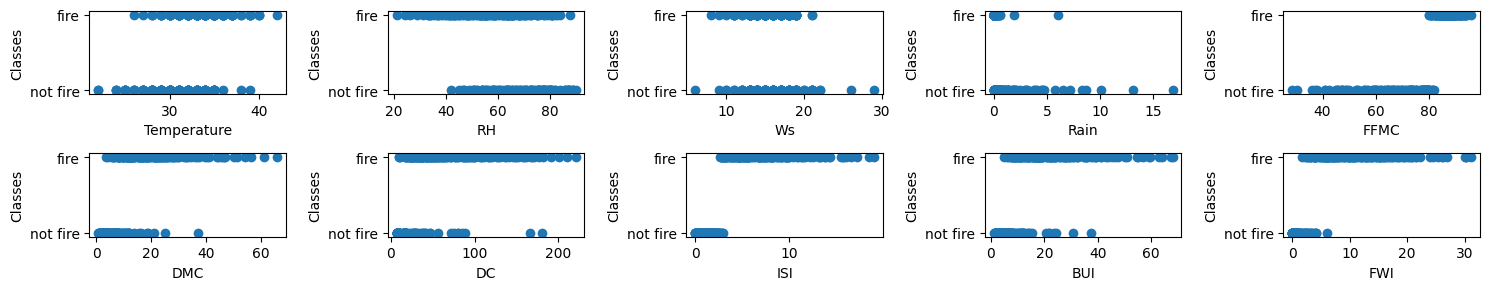

In [124]:
# Extract numeric and categorical columns
Numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
categorical_col = set(df.columns).difference(set(Numeric_columns))

# Visualization of the DataFrame
fig, ax = plt.subplots(2, 5, figsize=(15, 3))
for i in range(2):
    for j in range(5):
        c = (i * 5) + j
        column = df.columns[c]
        ax[i, j].scatter(df[column], df['Classes'])
        ax[i, j].set_xlabel(column)
        ax[i, j].set_ylabel('Classes')
plt.tight_layout()
plt.show()

In [125]:
 #Create dataset from DataFrame
X = df.loc[:, 'Temperature':'FWI']
y = df['Classes']

# Split the dataset
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1234)
X_train, X_val, y_train, y_val = model_selection.train_test_split(X_train, y_train, test_size=0.25, random_state=1234)

['fire' 'fire' 'not fire' 'not fire' 'fire' 'fire' 'not fire' 'fire'
 'fire' 'fire' 'not fire' 'not fire' 'fire' 'fire' 'not fire' 'not fire'
 'fire' 'fire' 'not fire' 'fire' 'fire' 'not fire' 'not fire' 'fire'
 'not fire' 'not fire' 'fire' 'fire' 'not fire' 'not fire' 'fire'
 'not fire' 'not fire' 'fire' 'fire' 'not fire' 'fire' 'not fire'
 'not fire' 'not fire' 'not fire' 'fire' 'fire' 'fire' 'not fire'
 'not fire' 'fire' 'not fire' 'not fire']
0.9591836734693877
0.9583333333333334


d:\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


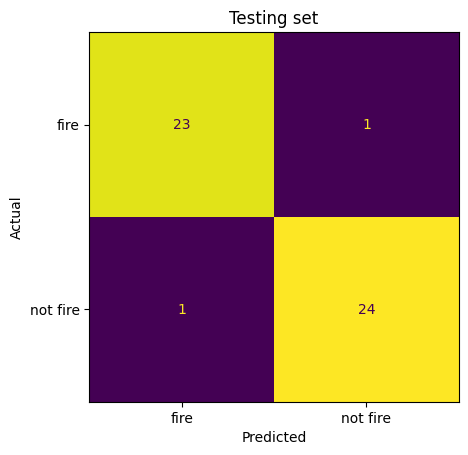

In [126]:
# Logistic Regression
# training
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(X_train, y_train)
# evaluation
from sklearn import metrics
y_test_hat = model.predict(X_test)
class_labels = ['fire', 'not fire']
print (y_test_hat)
print (metrics.accuracy_score(y_test, y_test_hat))
print (metrics. f1_score(y_test, y_test_hat, pos_label='fire'))
Logistic_regression = metrics.f1_score (y_test, y_test_hat, pos_label='fire')

# visualization of confusion matrix
import matplotlib.pyplot as plt
ax = plt.subplot()
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_hat, labels=class_labels, colorbar=
False, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Testing set')
plt.show()

['fire' 'fire' 'not fire' 'not fire' 'fire' 'fire' 'not fire' 'fire'
 'fire' 'fire' 'not fire' 'not fire' 'fire' 'fire' 'not fire' 'not fire'
 'fire' 'fire' 'not fire' 'fire' 'fire' 'not fire' 'not fire' 'fire'
 'not fire' 'not fire' 'fire' 'fire' 'not fire' 'not fire' 'fire'
 'not fire' 'not fire' 'fire' 'fire' 'not fire' 'fire' 'not fire'
 'not fire' 'not fire' 'not fire' 'fire' 'fire' 'fire' 'not fire' 'fire'
 'fire' 'not fire' 'not fire']
0.9387755102040817
0.9387755102040817


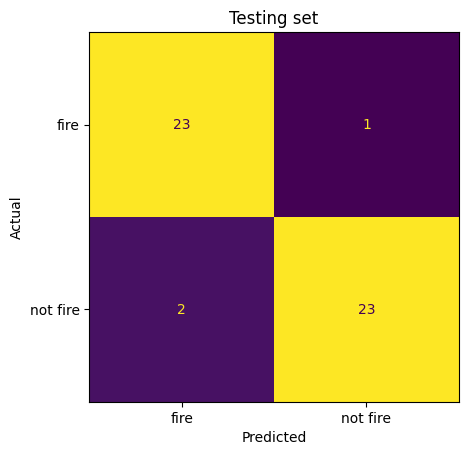

In [127]:
# Support vector machine
# training
from sklearn import svm
model = svm.SVC(kernel='linear', C=100)
model.fit(X_train, y_train)
# evaluation
from sklearn import metrics
y_test_hat = model.predict(X_test)
class_labels = ['fire', 'not fire']
print (y_test_hat)
print (metrics.accuracy_score(y_test, y_test_hat))
print (metrics.f1_score(y_test, y_test_hat, pos_label='fire'))
Support_vector_machine = metrics.f1_score (y_test, y_test_hat, pos_label='fire')

# visualization of confusion matrix
import matplotlib.pyplot as plt
ax = plt.subplot()
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_hat, labels=class_labels, colorbar=
False, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Testing set')
plt.show()

['fire' 'fire' 'not fire' 'fire' 'fire' 'fire' 'not fire' 'fire' 'fire'
 'fire' 'not fire' 'not fire' 'fire' 'fire' 'fire' 'not fire' 'fire'
 'fire' 'not fire' 'fire' 'fire' 'not fire' 'not fire' 'fire' 'fire'
 'not fire' 'fire' 'fire' 'not fire' 'not fire' 'fire' 'not fire'
 'not fire' 'fire' 'fire' 'not fire' 'fire' 'not fire' 'not fire'
 'not fire' 'not fire' 'fire' 'fire' 'fire' 'not fire' 'not fire' 'fire'
 'not fire' 'not fire']
0.8979591836734694
0.9019607843137256
(array([[ 9.48050632, 11.99291457, 14.05311353],
       [10.14692072, 10.83328205, 11.15481959],
       [ 5.41848687,  6.17089945,  6.63249576],
       [16.03090765, 18.81568495, 23.29141473],
       [10.30921918, 12.07683733, 12.24009804],
       [ 6.22735899,  8.47997642,  8.85494212],
       [ 6.20241888,  9.48314294,  9.64520606],
       [14.13187886, 14.82228053, 14.8435171 ],
       [10.41393297, 10.58206029, 11.16781089],
       [ 5.9573484 ,  6.93397433,  8.04238771],
       [ 5.67450438,  8.23711114,  8.35044

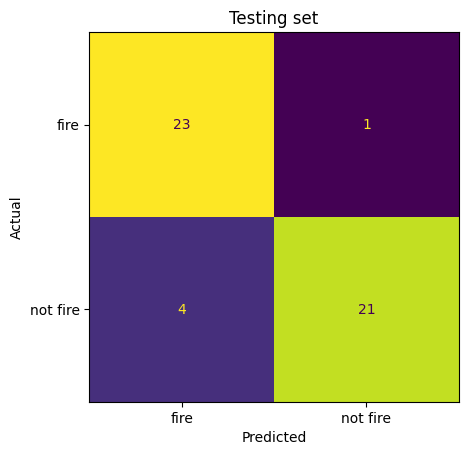

In [128]:
# k-Nearest neighbors
#training
from sklearn import neighbors
model = neighbors .KNeighborsClassifier(n_neighbors=3, p=2) # p=1:Manhattan, p=2:Euclidean
model.fit (X_train, y_train)
# evaluation
from sklearn import metrics
class_labels = ['fire', 'not fire']

y_test_hat = model.predict(X_test)
print (y_test_hat)
print (metrics.accuracy_score(y_test, y_test_hat))
print (metrics.f1_score(y_test, y_test_hat, pos_label='fire'))
print (model.kneighbors(X_test))
kNearest_neighbors = metrics.f1_score (y_test, y_test_hat, pos_label='fire')

# visualization of confusion matrix
import matplotlib.pyplot as plt
ax = plt.subplot()
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_hat, labels=class_labels, colorbar=
False, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Testing set')
plt.show()


['fire' 'fire' 'not fire' 'not fire' 'fire' 'fire' 'not fire' 'fire'
 'fire' 'not fire' 'not fire' 'not fire' 'fire' 'fire' 'fire' 'not fire'
 'fire' 'fire' 'not fire' 'fire' 'fire' 'not fire' 'not fire' 'fire'
 'not fire' 'not fire' 'fire' 'fire' 'not fire' 'not fire' 'fire'
 'not fire' 'not fire' 'fire' 'fire' 'not fire' 'fire' 'not fire'
 'not fire' 'not fire' 'not fire' 'fire' 'fire' 'fire' 'not fire'
 'not fire' 'fire' 'not fire' 'not fire']
0.9183673469387755
0.9166666666666666
[[1.00000000e+000 6.93642312e-043]
 [1.00000000e+000 4.28825523e-043]
 [1.76935186e-023 1.00000000e+000]
 [1.78707757e-007 9.99999821e-001]
 [1.00000000e+000 4.37279490e-053]
 [1.00000000e+000 4.92647366e-019]
 [4.17376762e-011 1.00000000e+000]
 [1.00000000e+000 5.17437581e-039]
 [1.00000000e+000 5.83321893e-014]
 [3.96388162e-002 9.60361184e-001]
 [8.89178932e-033 1.00000000e+000]
 [1.32681466e-008 9.99999987e-001]
 [1.00000000e+000 9.20859073e-033]
 [1.00000000e+000 2.03856479e-038]
 [9.86718497e-001 1.3

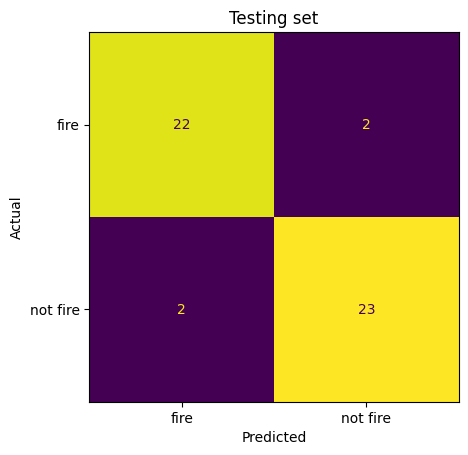

In [129]:
# Gaussian NB
# training
from sklearn import naive_bayes
model = naive_bayes.GaussianNB()
model.fit(X_train, y_train)
# evaluation
from sklearn import metrics
y_test_hat = model.predict(X_test)
class_labels = ['fire', 'not fire']
print(y_test_hat)
print(metrics.accuracy_score(y_test, y_test_hat))
print(metrics.f1_score(y_test, y_test_hat, pos_label='fire'))
print(model.predict_proba(X_test))
gaussianNB = metrics.f1_score (y_test, y_test_hat, pos_label='fire')

# visualization of confusion matrix
import matplotlib.pyplot as plt
ax = plt.subplot()
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_test_hat,labels=class_labels, colorbar=
False, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Testing set')
plt.show()

Accuracy: 0.9795918367346939
F1 Score: 0.9795918367346939


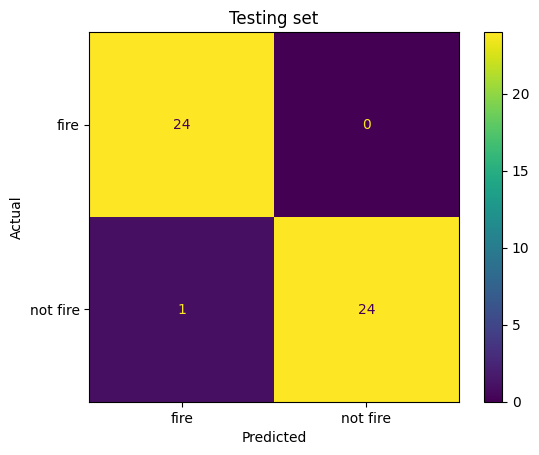

In [130]:
# Decision tree
model = tree.DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

# Model evaluation
y_test_hat = model.predict(X_test)
class_labels = ['fire', 'not fire']
print('Accuracy:', metrics.accuracy_score(y_test, y_test_hat))
print('F1 Score:', metrics.f1_score(y_test, y_test_hat, pos_label='fire'))
Descision_tree = metrics.f1_score (y_test, y_test_hat,pos_label='fire')

# Visualization of confusion matrix with specified labels
ax = plt.subplot()
metrics.ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, labels=class_labels, ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Testing set')
plt.show()

In [131]:
import pandas as pd

# Dataframe
data = [
    { 'Method': 'Logistic regression', 'F1': Logistic_regression},
    { 'Method': 'Support vector machine', 'F1': Support_vector_machine },
    { 'Method': 'Gaussian NB', 'F1': gaussianNB},

    { 'Method': 'Gaussian NB', 'F1': gaussianNB},
    { 'Method': 'Descision tree', 'F1':Descision_tree},
]
# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(data, index=range(1, len(data)+1))
df

,Method,F1
1,Logistic regression,0.958333
2,Support vector machine,0.938776
3,Gaussian NB,0.916667
4,Gaussian NB,0.916667
5,Descision tree,0.979592
